# vω空間におけるプロットのテスト

In [42]:
import pickle
from config import V_MAX, V_MIN, W_MAX, W_MIN, A_MAX, AW_MAX, DT
import matplotlib.pyplot as plt
import numpy as np

with open('/home/ytpc2022e/decwest_workspace/dwpp/simulation/scripts/pkl/curvatures.pkl', 'rb') as f:
    curvatures = pickle.load(f)
with open('/home/ytpc2022e/decwest_workspace/dwpp/simulation/scripts/pkl/regulated_vs.pkl', 'rb') as f:
    regulated_vs = pickle.load(f)
with open('/home/ytpc2022e/decwest_workspace/dwpp/simulation/scripts/pkl/robot_velocities.pkl', 'rb') as f:
    robot_velocities = pickle.load(f)
with open('/home/ytpc2022e/decwest_workspace/dwpp/simulation/scripts/pkl/robot_ref_velocities.pkl', 'rb') as f:
    robot_ref_velocities = pickle.load(f)
with open('/home/ytpc2022e/decwest_workspace/dwpp/simulation/scripts/pkl/time_stamps.pkl', 'rb') as f:
    time_stamps = pickle.load(f)

In [43]:
curvature = curvatures[len(curvatures)//2]
regulated_v = regulated_vs[len(curvatures)//2]
robot_velocity = robot_velocities[len(curvatures)//2]
robot_ref_velocity = robot_ref_velocities[len(curvatures)//2]
time_stamp = time_stamps[len(curvatures)//2]

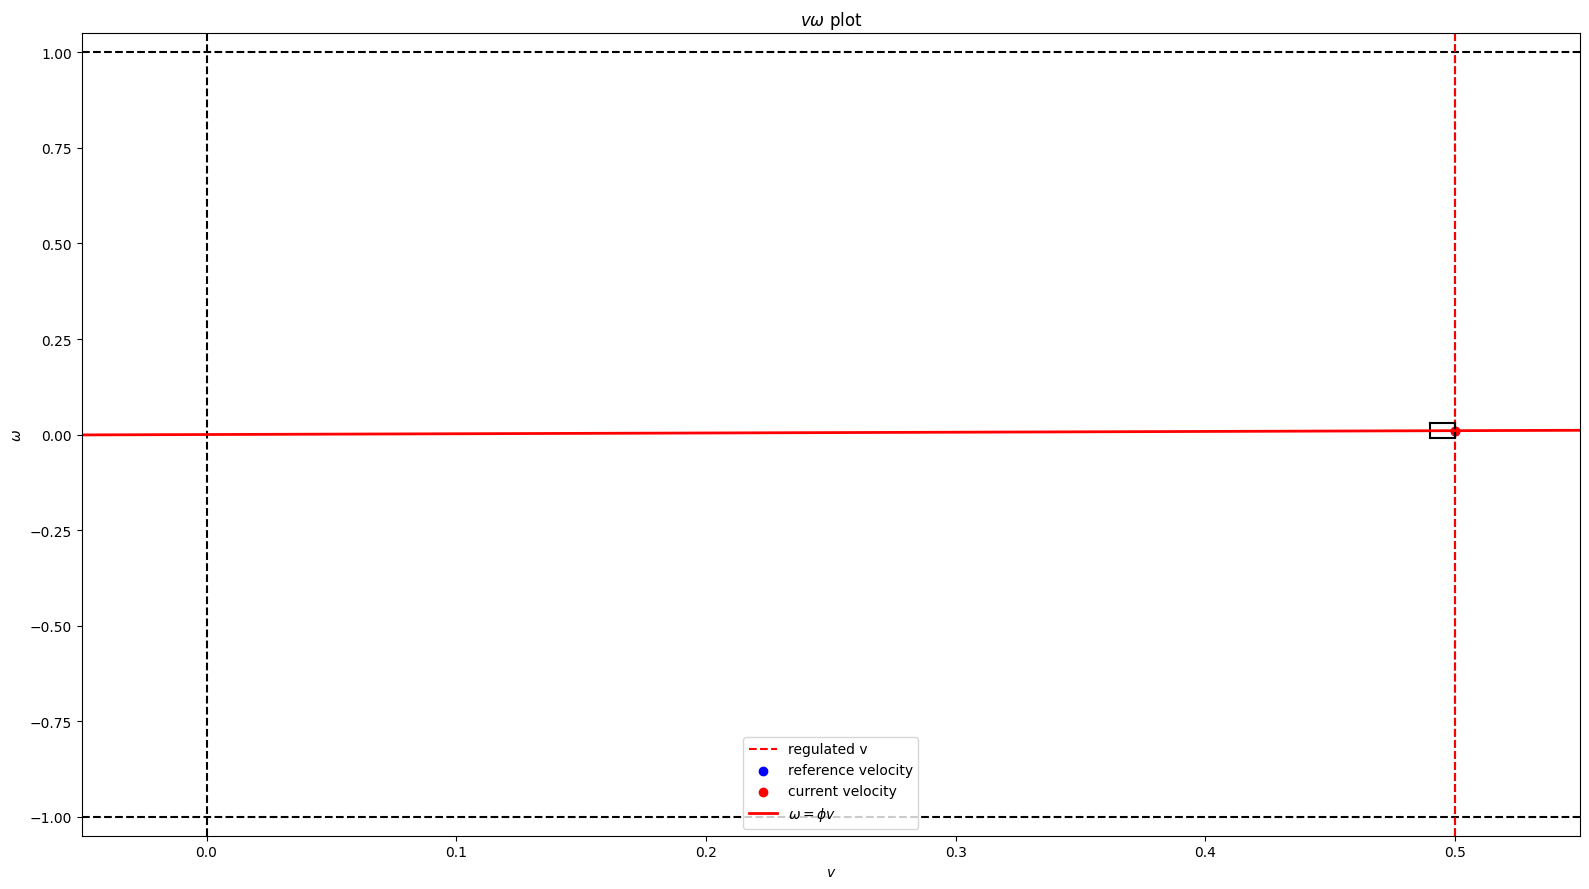

In [44]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax.set_xlim(V_MIN-0.05, V_MAX+0.05)
ax.set_ylim(W_MIN-0.05, W_MAX+0.05)
ax.set_xlabel('$v$')
ax.set_ylabel('$\omega$')
ax.set_title(f'$v$$\omega$ plot')
# ax.set_aspect('equal')

# 速度の上限値
ax.axvline(x = V_MAX, linestyle="--", c="black")
ax.axvline(x = V_MIN, linestyle="--", c="black")
ax.axhline(y = W_MIN, linestyle="--", c="black")
ax.axhline(y = W_MAX, linestyle="--", c="black")

# regulatedされた上限値
ax.axvline(x = regulated_v, linestyle="--", c="red", label="regulated v")

# 参照速度
ax.scatter(robot_ref_velocity[0], robot_ref_velocity[1], c="blue", label="reference velocity")

# 現在速度
ax.scatter(robot_velocity[0], robot_velocity[1], c="red", label="current velocity")

# dynamic window
dw_vmax = min(robot_velocity[0] + A_MAX * DT, V_MAX)
dw_vmin = max(robot_velocity[0] - A_MAX * DT, V_MIN)
dw_wmax = min(robot_velocity[1] + AW_MAX * DT, W_MAX)
dw_wmin = max(robot_velocity[1] - AW_MAX * DT, W_MIN)
# regulated_vの考慮
if dw_vmax > regulated_v:
    dw_vmax = max(dw_vmin, regulated_v)
ax.plot([dw_vmin, dw_vmin], [dw_wmin, dw_wmax], c="black")
ax.plot([dw_vmax, dw_vmax], [dw_wmin, dw_wmax], c="black")
ax.plot([dw_vmin, dw_vmax], [dw_wmin, dw_wmin], c="black")
ax.plot([dw_vmin, dw_vmax], [dw_wmax, dw_wmax], c="black")

# 曲率の直線
ax.axline((0, 0), slope=curvature, color='red', lw=2, label="$\omega={\phi}v$")

ax.legend()
plt.tight_layout()



In [45]:
for idx, (curvature, regulated_v, robot_velocity, robot_ref_velocity, time_stamp) in enumerate(zip(curvatures, regulated_vs, robot_velocities, robot_ref_velocities, time_stamps)):
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.set_xlim(V_MIN-0.05, V_MAX+0.05)
    ax.set_ylim(W_MIN-0.2, W_MAX+0.2)
    ax.set_xlabel('$v$')
    ax.set_ylabel('$\omega$')
    ax.set_title(f'$v$$\omega$ plot')
    # ax.set_aspect('equal')

    # 速度の上限値
    ax.axvline(x = V_MAX, linestyle="--", c="black")
    ax.axvline(x = V_MIN, linestyle="--", c="black")
    ax.axhline(y = W_MIN, linestyle="--", c="black")
    ax.axhline(y = W_MAX, linestyle="--", c="black")

    # regulatedされた上限値
    ax.axvline(x = regulated_v, linestyle="--", c="red", label="regulated v")

    # 参照速度
    ax.scatter(robot_ref_velocity[0], robot_ref_velocity[1], c="green", label="reference velocity")

    # 現在速度
    ax.scatter(robot_velocity[0], robot_velocity[1], c="red", label="current velocity")

    # dynamic window
    if idx == 0:
        prev_robot_velocity = robot_velocity
    else:
        prev_robot_velocity = robot_velocities[idx-1]

    # 一時刻前の速度
    ax.scatter(prev_robot_velocity[0], prev_robot_velocity[1], c="blue", label="last velocity")
    
    dw_vmax = min(prev_robot_velocity[0] + A_MAX * DT, V_MAX)
    dw_vmin = max(prev_robot_velocity[0] - A_MAX * DT, V_MIN)
    dw_wmax = min(prev_robot_velocity[1] + AW_MAX * DT, W_MAX)
    dw_wmin = max(prev_robot_velocity[1] - AW_MAX * DT, W_MIN)
    # regulated_vの考慮
    if dw_vmax > regulated_v:
        dw_vmax = max(dw_vmin, regulated_v)
    ax.plot([dw_vmin, dw_vmin], [dw_wmin, dw_wmax], c="black", label="dynamic window")
    ax.plot([dw_vmax, dw_vmax], [dw_wmin, dw_wmax], c="black")
    ax.plot([dw_vmin, dw_vmax], [dw_wmin, dw_wmin], c="black")
    ax.plot([dw_vmin, dw_vmax], [dw_wmax, dw_wmax], c="black")

    # 曲率の直線
    ax.axline((0, 0), slope=curvature, color='red', lw=2, label="$\omega={\phi}v$")

    ax.legend()
    plt.tight_layout()
    plt.savefig(f"/home/ytpc2022e/decwest_workspace/dwpp/simulation/results/step_curve_0/vw_plot/{idx:04d}.png")
    
    plt.close()

動画化

In [50]:
from pathlib import Path
import cv2

path = Path("/home/ytpc2022e/decwest_workspace/dwpp/simulation/results/step_curve_0/vw_plot/dwpp")
image_paths = sorted(path.glob("*.png"))
h, w, _ = cv2.imread(str(image_paths[0])).shape
fourcc = cv2.VideoWriter_fourcc('m','p','4', 'v')
video_path = f"/home/ytpc2022e/decwest_workspace/dwpp/simulation/results/step_curve_0/vw_plot/dwpp.mp4"
video = cv2.VideoWriter(video_path, fourcc, int(1//DT), (w, h))
for image_path in image_paths:
    image = cv2.imread(str(image_path))
    video.write(image)
video.release()